### Import Libraries

In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

In [2]:
diab_df=pd.read_csv('Dataset/diabetes.csv')

### Read first 5 record

In [3]:
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data Cleaning

### check how many null values are placed in problem

In [4]:
diab_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### group of age using value counts

In [5]:
diab_df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

### Insulin level counts

In [6]:
diab_df['Insulin'].value_counts()

0      374
105     11
140      9
130      9
120      8
100      7
94       7
180      7
110      6
115      6
135      6
66       5
49       5
56       5
76       5
210      5
90       4
88       4
125      4
71       4
200      4
155      4
64       4
160      4
168      4
165      4
54       4
190      4
36       3
182      3
      ... 
191      1
166      1
188      1
184      1
171      1
119      1
255      1
318      1
91       1
310      1
81       1
304      1
300      1
183      1
86       1
291      1
89       1
284      1
280      1
258      1
278      1
277      1
275      1
274      1
272      1
271      1
270      1
108      1
112      1
846      1
Name: Insulin, Length: 186, dtype: int64

### Visualize outcome(diabetics/non-diabetics)

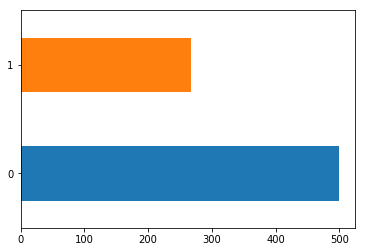

In [7]:
count=diab_df['Outcome'].value_counts()
count.plot.barh()

### Read column names

In [8]:
diab_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### copy dataset and replace from 0 to Not a number

In [9]:
diabets_data_copy=diab_df.copy(deep=True)
diabets_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]=diabets_data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.nan)

### check null values 

In [10]:
diabets_data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### fill null values through mean and median

In [11]:
diabets_data_copy['Glucose'].fillna(diabets_data_copy['Glucose'].mean(),inplace=True)

diabets_data_copy['BloodPressure'].fillna(diabets_data_copy['BloodPressure'].mean(),inplace=True)

diabets_data_copy['SkinThickness'].fillna(diabets_data_copy['SkinThickness'].median(),inplace=True)

diabets_data_copy['Insulin'].fillna(diabets_data_copy['Insulin'].median(),inplace=True)

diabets_data_copy['BMI'].fillna(diabets_data_copy['BMI'].median(),inplace=True)


### Again check null values or not

In [12]:
diabets_data_copy.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
Bucket Analysis where more than 3 pregnancies here placed 4

In [13]:
#greaTER THAN 3 PREGENCIES TO 4

diabets_data_copy.Pregnancies[diabets_data_copy.Pregnancies>3]=4

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### how many numbers and how many times prepagancies using value counts

In [14]:
diabets_data_copy['Pregnancies'].value_counts()

4    344
1    135
0    111
2    103
3     75
Name: Pregnancies, dtype: int64

### select x,y independent,dependent

In [15]:
from sklearn.linear_model import LogisticRegression

In [17]:
x=diabets_data_copy.drop(columns='Outcome') #8 features are independents

In [18]:
y=diabets_data_copy['Outcome']#y dependents 1 features

### Train test split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0,shuffle=True)

### fit the model

In [21]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### predict

In [22]:
y_pred=logreg.predict(x_test)

In [23]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

### Testing 

In [31]:
input_var_pred=[[3,250,95,35,300,35,0.4,42]]
out_come=logreg.predict(input_var_pred)
print(out_come)

[1]
